# **Ejercicio de técnicas de mineria**

**Equipo** **6**; gpo: 01, *lunes*. 

Integrantes:

* 1794593 Gutiérrez Herrera Luisa Fernanda.
* 1796551 Sánchez Bracho Joss Alberth
* 1847156 Montemayor Guerra Diego Marcelo
* 1852645 Ovalle Salas Britany
* 1861240 Ávila Rodríguez Delfino Azael

Nuestra base de datos se llama *Video Game Sales* y el url de la página donde se encuentra es: *https://www.kaggle.com/gregorut/videogamesales*

Lo primero que vamos a realizar para las tecnicas de mineria es limpiar nuestra base datos, para posteriormente generar bases mas resumidas para aplicar las distintas tecnicas de nuestro interes.

In [9]:
import pandas as pd
import numpy as np

bd= pd.read_csv("vgsales.csv") #Se lee y asigna la base de datos a la variable bd

#Gracias a el analisis de visualizacion, eliminaremos las siguientes variables
bdn= bd.drop(['EU_Sales','JP_Sales','Other_Sales'],axis=1) 

#Reemplazaremos los datos nulos por ceros para un mejor manejo de la informacion
bdc = bdn.fillna(0) 

#Le cambiaremos los nombres a las columnas para una mejor interpretacion de los datos
bd1=bdc.rename(columns = {'Rank':'Ranking','Name':'Nombre','Platform':'Plataforma', 'Year':'Año', 'Genre':'Genero',
                     'Publisher':'Desarrolladora','NA_Sales':'Ventas_Norte_America_(MDD)', 'Global_Sales':'Ventas_Globales_(MDD)'})
bd1.head(3)

,Ranking,Nombre,Plataforma,Año,Genero,Desarrolladora,Ventas_Norte_America_(MDD),Ventas_Globales_(MDD)
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,35.82


## **Regresión lineal:**

> Para esta técnica de minería nos basamos de: *https://rpubs.com/Joaquin_AR/226291?fbclid=IwAR0HLj4emZiRUGTHXkgiFRru-kUwBMD3QN5xBuWCn_vkkFpRZfn_Mwkw9bM* 

> En esta página encontramos toda la documentaciión referente a la regresión lineal en R. Utilizamos R ya que es el lenguaje con el que nos sentimos mas cómodos trabajando con el analisis estadístico.

Al tener la base de datos limpia procederemos a seleccionar las columnas de nuestro interés. En este caso lo que queremos comprobar es si existe algun modelo para analizar la relacion entre las ventas de videojuegos en Norteamérica con las ventas globales. Nuestra suposicion es que si puede haber algun modelo, ya que en el mapa de correlaciones nos encontramos con el dato de que la correlacion entre Ventas_Norte_America_(MDD) y Ventas_Globales_(MDD) es muy alta (de 0.9) lo que indica que estan relacionadas.

In [ ]:
#Crear base de datos para regresion lineal
#Buscamos evaluar la relacion entre las ventas en NA y las ventas globales de videojuegos

bd_reg = bd1.iloc[:, [6,7]]
bd_reg.to_csv (r'base_regresion.csv', index = False, header=True)
bd_reg

,Ventas_Norte_America_(MDD),Ventas_Globales_(MDD)
0,41.49,82.74
1,29.08,40.24
2,15.85,35.82
3,15.75,33.00
4,11.27,31.37
...,...,...
16593,0.01,0.01
16594,0.01,0.01
16595,0.00,0.01
16596,0.00,0.01


Al ya tener la base de datos con solo nuestras 2 variables de interes, podemos realizar el análisis estadístico en Rstudio.

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


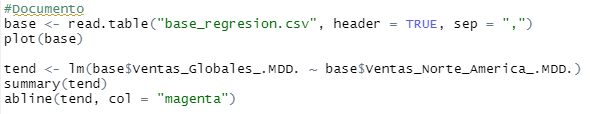

In [6]:
#@title Codigo utilizado en R
from IPython.display import Image
#Copiamos la ruta de acceso y la pegamos entre las comillas
Image("/content/drive/MyDrive/Imagenes/Codigo_regresion.png")

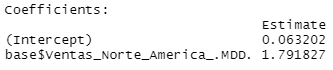

In [7]:
#@title Coeficientes de la regresión
from IPython.display import Image
#Copiamos la ruta de acceso y la pegamos entre las comillas
Image("/content/drive/MyDrive/Imagenes/Coeficientes_regresion.png")

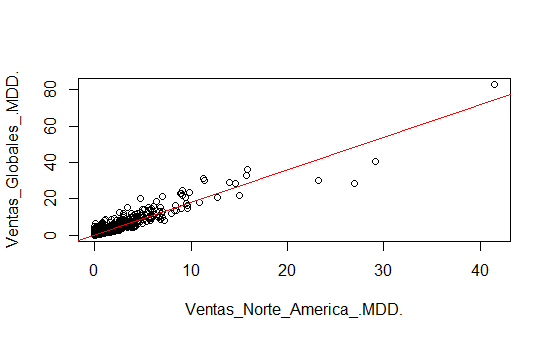

In [8]:
#@title Gráfica de la regresión
from IPython.display import Image
#Copiamos la ruta de acceso y la pegamos entre las comillas
Image("/content/drive/MyDrive/Imagenes/Grafica_regresion.png")

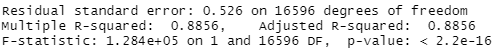

In [ ]:
#@title Indicadores de la regresión
from IPython.display import Image
#Copiamos la ruta de acceso y la pegamos entre las comillas
Image("/content/drive/MyDrive/Imagenes/Indicadores_regresion.png")

###Conclusiones
Como **métricas de evaluación** para esta técnica utilizaremos los indicadores del *p-valor* y la *R cuadrada ajustada*.

El *p-valor* es igual al 2.2e-16, lo cual es un valor muy pequeño lo que nos indica que si hay una relacion entre las variables Ventas_Norte_America_(MDD) y Ventas_Globales_(MDD) ya que es mucho menor a un alfa de 0.05. Por lo que podemos concluir que hay una relacion lineal entre estas variables con un 95% de confianza.

Con la R cuadrada ajustada, lo que estamos buscando es que se acerque lo mas posible al 1, ya que es una proporción que nos indica que porcentaje de los datos es explicado por el modelo. En nuestro caso la R cuadrada ajustada es igual a 0.8856 lo que es algo bueno, ya que explica un gran numero de nuestros datos.

Por lo tanto el modelo de regresión lineal con el que nos quedariamos seria con:

**Ventas_Globales_(MDD) = 0.063202 + 1.791827(Ventas_Norte_America_(MDD))**

Una de las áreas de oportunidad identificadas es que se puede buscar un mejor modelo, es decir, con un R cuadrada mayor al actual.

#Series de Tiempo


> Para esta técnica de minería nos basamos de: *https://doi.org/10.13140/RG.2.1.2571.9841* 

Al tener la base de datos limpia procederemos a seleccionar las columnas de nuestro interés. En este caso lo que queremos comprobar es hacer las proyecciones de las ventas de videojuegos de acción en Norteamerica, ya que es nuestro mercado objetivo y con la práctica de visualización encontramos que ese género ha sido el mas vendido en este mercado. Por lo cual utilizaremos series de tiempo ya que es la técnica mas adecuada para hacer proyecciones.

Lo primero que haremos va a ser seleccionar las columnas de nuestro interes y hacer nuestra serie de tiempo.

In [32]:
#Crear base de datos para series de tiempo
#Buscamos juntar las ventas de videojuegos de accion en Norteamerica por año

bd_reg = bd1.iloc[:, [3,4,6]]
bd_reg = bd_reg.loc[bd_reg.loc[:,'Genero']=="Action"]
bd_reg = bd_reg.drop(['Genero'], axis = 1)
bd_reg.to_csv (r'serie_videojuegos.csv', index = False, header=True)
bd_reg

,Año,Ventas_Norte_America_(MDD)
16,2013.0,7.01
17,2004.0,9.43
23,2013.0,9.63
24,2002.0,8.41
38,2001.0,6.99
...,...,...
16564,2007.0,0.01
16567,2014.0,0.00
16582,2001.0,0.01
16583,1999.0,0.01


Ya que obtuvimos la serie pudimos empezar con el analisis, para esto elegimos hacerlo en R, ya que es donde nos sentimos mas comodo para el análisis estadístico. 

In [ ]:
%load_ext rpy2.ipython


R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/tseries_0.10-48.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 170342 bytes (166 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wr

Time Series:
Start = 2017 
End = 2026 
Frequency = 1 
 [1]   -7.233088  -23.548048  -42.847942  -62.854717  -82.925084 -103.001171
 [7] -123.077774 -143.154422 -163.231075 -183.307728


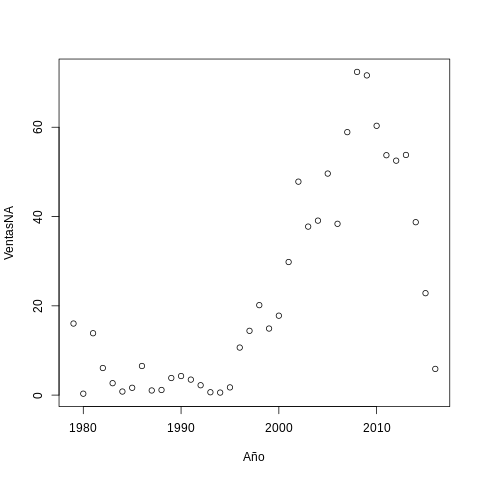

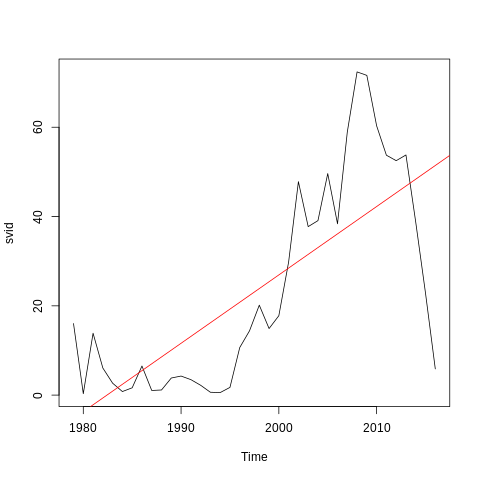

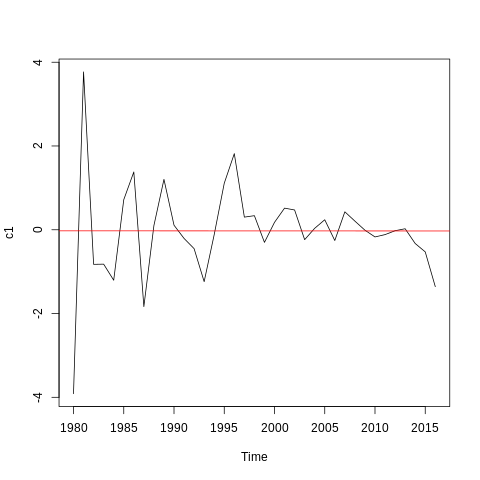

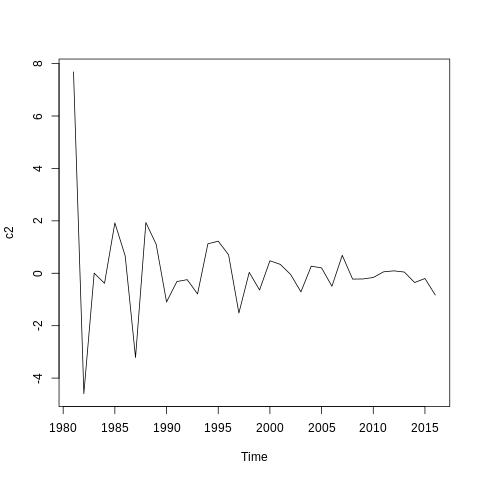

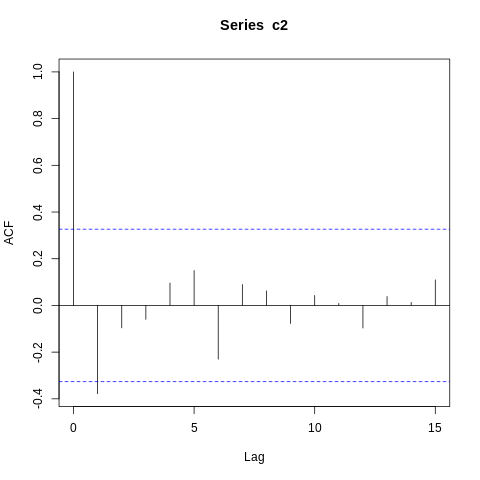

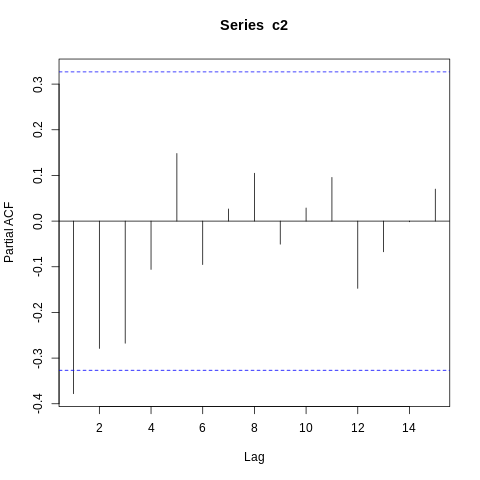

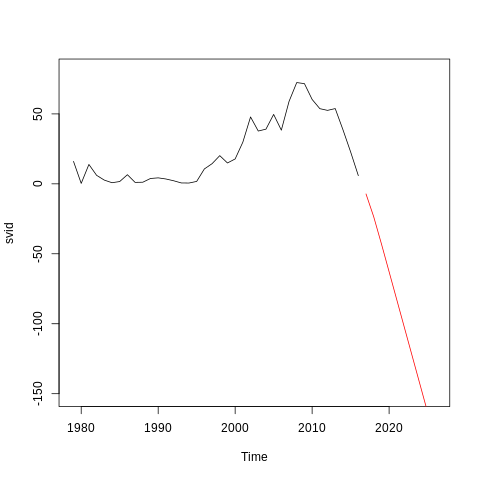

In [ ]:
%%R
install.packages("tseries")
vid = read.csv("serie_videojuegos.csv", fileEncoding = "Latin1", check.names = F)
vid
library(tseries)
plot(vid)

  svid<-ts(vid$VentasNA, start=c(1979), end=c(2016))
  plot(svid)


#1.-Clasificación
#1.1 cambios en media
rl<-lm(svid~time(svid))
abline(rl,col="red")
summary(rl)
#H0: el modelo no es significativo
#Ha: el modelo es significativo
#como (p-valor=1.29e-07) < (alpha=.05)  RH0
#el modelo es significativo, la serie NO es estacionaria en media


#1.2 Cambios en varianza
library(tseries)
adf.test(svid,alternative = "stationary")
#H0:no es estacionaria en var
#Ha: es estacionaria en var
#(pvalor = 0.9632) > (alpha = 0.05) , No RH0. NO es estacionaria en var con 95% de confianza

#realizamos corrección

c1<-diff(log(svid))#datos log
plot(c1)

#revisando si funciona la correcion
#tendencia de c1
tc<-lm(c1~time(c1))
summary(tc)
abline(tc,col="red")
#H0: el modelo no es significativo
#Ha: el modelo es significativo
#como (p-valor=.9965) > (alpha=.05)  NO RH0
#el modelo no es significativo, la serie es estacionaria en media
#sin tendencia, estacionaria en media

#Cambios en varianza
adf.test(c1,alternative = "stationary")
#H0:no es estacionaria en var
#Ha: es estacionaria en var
#(pvalor = 0.3091) > (alpha = 0.05) , No RH0. NO es estacionaria en var con 95% de confianza


#realizamos segunda correccion
c2<-diff(c1)
plot(c2)

#revisando correcion 2
#cambio en media
tlc2<-lm(c2~time(c2))
summary(tlc2)#no muestra tendencia 
#H0: el modelo no es significativo
#Ha: el modelo es significativo
#como (p-valor=0.3904) > (alpha=.05)  NO RH0
#el modelo no es significativo, la serie es estacionaria en media


#varianza
adf.test(c2,alternative = "stationary")
#pvalor<alpha
#estacionaria en varianza


#serie c2 estacionaria
#modelando c2
#autocorrelogramas
acf(c2)
pacf(c2)#sugerencia de ARMA


#Buscando ARMA,ciclo doble

aic.mejor.arma<-Inf
for(j in 0:10){
  for (i in 0:10) {
    u<-AIC(arima(c2, order=c(j,0,i), method="ML"))
    if(u<aic.mejor.arma){
      aic.mejor.arma<-u 
      pq<-c(j,0,i) #guardando el orden
    }
  }
}
aic.mejor.arma #118.4447
pq#arma(1,4)

AIC(arima(svid, order=c(1,2,4), method="ML"))#271.1209

plot(svid, xlim = c(1979, 2026),ylim=c(-150,80))
p.o11 <- predict(arima(svid, order = c(1,2,4), method = "ML"), n.ahead = 10)$pred
lines(p.o11, col = "red")
p.o11





###Conclusiones
Como **métricas de evaluación** para esta técnica utilizamos el indicador del *AIC*.

En este caso estamos buscando el modelo con el *AIC* mas pequeño, y obtuvimos como resultado un modelo ARIMA(1,2,4), ya que tuvimos que diferencias 2 veces la serie y el modelo resultante fue un ARMA(1,4).

Como conclusion podemos decir que los datos arrojados con la tecnica de series de tiempo no brindan informacion significante ya que las proyecciones resultaron negativas, esto se debe a que las ventas disminuyeron en los ultimos años eso hace que la proyeccion quede negativa.

Por lo que algo que podriamos mejorar seria cambiar las ventas que estamos tomando en cuenta, ya que en este caso tomamos solo las ventas de videojuegos de accion, por lo que lo mas favorable seria ver las ventas totales en norteamerica para ver como se va a comportar este mercado en los proximos años.